In [1]:
import pandas as pd
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Epidemiology Model 


# Data 
- 1. COVID-19 US cases: Directly read data from JHU github repo.
- 2. Mobility Data provided by Apple for each county in the U.S.


In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
us_confirmed_df = pd.read_csv(url, error_bad_lines=False)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
us_death_df = pd.read_csv(url, error_bad_lines=False)

display(us_confirmed_df.head())
display(us_death_df.head())

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
global_recover_df = pd.read_csv(url, error_bad_lines=False)
display(global_recover_df.head())


url = "https://raw.githubusercontent.com/descarteslabs/DL-COVID-19/master/DL-us-m50.csv"
mobility = pd.read_csv(url, error_bad_lines=False)
display(mobility.head())

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2197,2212,2230,2242,2267,2283,2304,2328,2351,2385
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,6995,7061,7097,7134,7188,7226,7263,7348,7409,7454
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1074,1079,1080,1090,1092,1095,1098,1107,1112,1113
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,890,897,907,917,924,926,932,948,961,966
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2162,2188,2222,2253,2286,2297,2335,2378,2400,2429


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,31,31,31,30,30,30,30,30,32,32
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,74,77,77,83,83,83,83,84,84,84
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,9,9,9,9,9,9,9,9,9,9
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,15,15,15,15,16,16,16,17,17,17
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,25,25,25,26,26,26,26,26,34,34


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34355,34362,34440,34440,34446,34458,34721,34954,34967,35024
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11473,11578,11696,11861,12002,12092,12203,12353,12493,12574
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,40577,41001,41244,41510,41783,42037,42325,42626,42980,42980
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,3627,3734,3858,3858,4043,4248,4332,4405,4488,4585
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,5230,5266,5350,5626,5647,5899,5927,6036,6125,6250


,country_code,admin_level,admin1,admin2,fips,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,...,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10
0,US,1,Alabama,NaN,1.0,8.331,10.398,10.538,10.144,10.982,...,6.870,8.917,9.278,10.071,9.666,11.000,9.240,6.882,8.321,9.877
1,US,2,Alabama,Autauga County,1001.0,7.194,14.587,13.865,13.880,14.659,...,6.555,10.455,11.010,12.833,13.433,15.168,8.325,6.251,9.831,12.809
2,US,2,Alabama,Baldwin County,1003.0,9.780,12.042,11.481,10.879,12.381,...,7.114,9.492,9.476,10.773,10.372,10.924,10.025,8.603,8.875,10.650
3,US,2,Alabama,Barbour County,1005.0,8.348,10.004,9.267,6.517,8.247,...,5.980,9.754,8.644,8.255,8.920,10.372,8.006,6.834,7.487,8.587
4,US,2,Alabama,Bibb County,1007.0,13.008,23.076,24.164,22.768,26.944,...,10.613,12.624,14.800,15.509,15.935,21.178,17.072,7.701,13.311,18.842


In [109]:
import datetime
base = datetime.datetime(2020, 3,22, 0, 0, 0, 0)
numdays = 21
date_list = [base + datetime.timedelta(days=x) for x in range(numdays)]
#date_list = [date.strftime("%m-%d-%Y") for date in date_list]
domain = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"
df = pd.DataFrame()

for date in date_list:
    date = date.strftime("%m-%d-%Y")
    daily_report = pd.read_csv(domain+date+".csv", error_bad_lines=False)
    daily_report = daily_report.loc[daily_report["Province_State"] == "Washington"]
    daily_report["Date"] = date
    df = df.append(daily_report)
    print(len(df))
            
df_2 = pd.read_csv("data/Washington/0322_0411.csv")
df_2.groupby("Date").agg({"Confirmed":"sum","Deaths":"sum","Recovered":"sum","Active":"sum"})

import datetime
base = datetime.datetime(2020, 1, 22, 0, 0, 0, 0)
numdays = 60
date_list = [base + datetime.timedelta(days=x) for x in range(numdays)]
#date_list = [date.strftime("%m-%d-%Y") for date in date_list]
domain = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"
domain_us = "https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports_us"
df = pd.DataFrame()

for date in date_list:
    date = date.strftime("%m-%d-%Y")
    daily_report = pd.read_csv(domain+date+".csv", error_bad_lines=False)
    daily_report = daily_report.loc[daily_report["Country/Region"] == "US"]
    daily_report["Date"] = date
    df = df.append(daily_report)   
            
    
df.fillna(0).to_csv("data/Washington/0122_0320.csv")   

41
81
121
161
201
241
281
321
361
396
431
466
503
541
579
617
655
693
731
769
808


In [72]:
wa = df.loc[df["Province/State"]== "Washington"].sort_values("Date").fillna(0).set_index("Date")
wa_confirmed = wa["Confirmed"]
wa_death = wa["Deaths"]
wa_recovered = wa["Recovered"]
wa_population = 7.5e6
wa_removed = wa_recovered.values+wa_recovered.values
wa_suspected = wa_population - wa_confirmed
wa_infected = wa_confirmed


# Key variables of Epidemiology Model
- I, the number of infected, is in the `us_comfirmed`
- S, susceptible to COVID-19, is in `us_population` - `us_confirmed`, denoted as `us_susceptible`
- R, removed, is the sum of recovered and deceased. 
- N, population

## Parameters
- Beta: the infection rate
- D: number of days a patient can stay infected

## Goal
- With existing knowledge of I,S,R,and N, use gradient descent to figure out $\theta$ = ($\beta$, D)

In [127]:
us_confirmed_df.columns[0:12]
washington_confirmed = us_confirmed_df.loc[us_confirmed_df.Province_State == "Washington"]
washington_confirmed

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20
3143,84053001,US,USA,840,53001.0,Adams,Washington,US,46.982998,-118.560173,...,917,922,924,928,935,935,939,943,956,959
3144,84053003,US,USA,840,53003.0,Asotin,Washington,US,46.188944,-117.202285,...,234,237,252,275,278,294,301,308,314,318
3145,84053005,US,USA,840,53005.0,Benton,Washington,US,46.239470,-119.512083,...,5243,5265,5275,5292,5342,5385,5442,5530,5594,5646
3146,84053007,US,USA,840,53007.0,Chelan,Washington,US,47.870461,-120.617396,...,2002,2004,2006,2014,2018,2025,2033,2039,2042,2049
3147,84053009,US,USA,840,53009.0,Clallam,Washington,US,48.047546,-123.922632,...,264,269,269,269,271,271,272,273,273,275
3148,84053011,US,USA,840,53011.0,Clark,Washington,US,45.775680,-122.482920,...,4352,4385,4417,4473,4514,4566,4615,4678,4744,4826
3149,84053013,US,USA,840,53013.0,Columbia,Washington,US,46.294429,-117.905198,...,14,14,14,16,17,17,17,17,18,22
3150,84053015,US,USA,840,53015.0,Cowlitz,Washington,US,46.190747,-122.678223,...,803,807,817,823,831,832,840,849,864,875
3151,84053017,US,USA,840,53017.0,Douglas,Washington,US,47.736134,-119.692937,...,1233,1235,1237,1239,1240,1243,1244,1244,1245,1250
3152,84053019,US,USA,840,53019.0,Ferry,Washington,US,48.471143,-118.515404,...,34,34,35,35,35,35,35,35,35,35


In [108]:
washington_death =  us_death_df.loc[us_death_df.Province_State == "Washington"]
#washington_population = washington_death.loc["Population"].sum()
#washignton_population

In [105]:
global_recover_df.loc[global_recover_df["Country/Region"] == "US"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20
231,NaN,US,40.0,-100.0,0,0,0,0,0,0,...,3487666,3518140,3554336,3578452,3612478,3630579,3674981,3705130,3743527,3781751


In [130]:
# Data Preparation
us_confirmed = us_confirmed_df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'],axis=1).sum(axis=0).values
us_death = us_death_df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key',"Population"],axis=1).sum(axis=0).values
us_recovered = global_recover_df.loc[global_recover_df["Country/Region"] == "US"].drop(
    ["Province/State","Country/Region","Lat","Long"],axis= 1).values[0]
#us_removed = us_recovered+us_death
us_removed = us_recovered+us_death
#us_population = us_death_df.Population.sum()
us_population = 1e7
us_infected = us_confirmed 
us_susceptible = us_population - us_infected

#test data
us_removed = us_removed[0:100]
us_susceptible = us_susceptible[0:100]
us_infected = us_infected[0:100]

## Gradient Descent to solve for $\beta$ and $\frac{1}{D}$

Given: 
$\begin{align*}
  &\xi = \frac{1}{D} \\
  &f_s(I_n,N,S_n) = -\beta\left(\frac{I_n}{N}\right) S_n, \\
  &f_I(I_n,N,S_n) = - I\xi + \beta\left(\frac{I_n}{N}\right) S_n,  \\
  &f_R(I_n) = I_n\xi, \\
  &h=1
\end{align*}
$

Plug the above values into
$\frac{1}{N} \sum_{n=1}^N \nabla_{\theta} \left( \left({\frac{s(n+1)-s(n)}{h} - f_s(s(n), I(n), R(n);\theta)}\right)^2
+ \left({\frac{I(n+1)-I(n)}{h} - f_I(s(n), I(n), R(n;\theta)}\right)^2 + \dots \right)$

To calculate the above the term, we need to use __chain rule__ to differentiate with respect to $\beta$ and $\xi$

$\nabla_{\beta} = 2 \cdot \left(\frac{S_{n+1} - S_{n}}{h} - \left(-\beta S_n  \frac{I_n}{N}\right) \right) \cdot \left(S_n \cdot \frac{I_n}{N}\right) + 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  - \left( -\xi_k I_n + \beta_k \frac{I_n}{N} S_n \right)\right) \cdot \left( -S_n \cdot \frac{I_n}{N}\right)$

$\nabla_{\xi} = 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  + \left(I_n\xi_k - \beta_k \frac{I_n}{N}S_n\right) \right) \cdot \left(I_n\right) + 2 \cdot \left(\frac{R_{n+1} - R_{n}}{h} - I_n\xi_k\right) \cdot \left( -I_n\right)$



## Tuning
First initialize $\theta$ at $\beta = 0.2 $ and $\xi = 0.1$


Then, at each iteration update $\beta$ and $\xi$ according to the rules below


$\beta_{k+1} = \beta_k - h_G \partial_\beta L(\theta|s(1),\dots,s(N)),$


$
\xi_{k+1} = \xi_k - h_G \partial_\xi L(\theta|s(1),\dots,s(N)).$
 where $h_G = 0.001$
 

0.22510833779655964
198.79568071600204


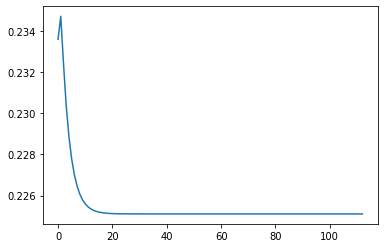

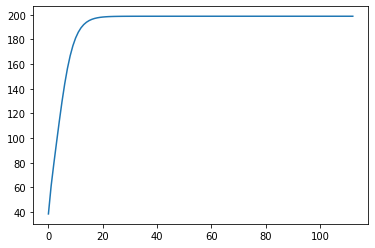

In [475]:
us_confirmed_df = us_confirmed_df.loc[us_confirmed_df.Admin2 != "Unassigned"]
us_death_df = us_death_df.loc[us_death_df.Admin2 != "Unassigned"]
def calculate_gradient(s,i,r,population,beta,epsilon):
    result1 = 0 #continue adding to solve for beta
    result2 = 0 #continue adding to solve for 1/D aka epsilon
    for n in range(len(s)-1):
        result1 += 2*(s[n+1]-s[n]+beta*s[n]*(i[n]/population))*(s[n]*i[n]/population)
        result1 += 2*(i[n+1]-i[n]-beta*s[n]*(i[n]/population) + i[n]*epsilon)*(-s[n]*i[n]/population)
        
        result2 += 2*(i[n+1]-i[n]+i[n]*epsilon-beta*i[n]*s[n]/population)*(i[n])
        result2 += 2*(r[n+1]-r[n]-i[n]*epsilon)*(-i[n])
        
    return result1,result2
def calculate(s,i,r,population,learning_rate1,learning_rate2):
    beta = 0.2
    epsilon = 1/14
    
    loss = 0
    length = len(s)
    betas = []
    ds = []
    
    for itera in range(1000): # do it for 10 iterations.
        
        loss1,loss2 = calculate_gradient(s,i,r,population,beta,epsilon)
        beta_new = beta - learning_rate1* loss1/length #0.001 is the learning rate
        epsilon_new = epsilon - learning_rate2 * loss2/length
        if (beta_new == beta) & (epsilon_new == epsilon):
            print(beta_new)
            print(1/epsilon_new)
            break
        beta = beta_new
        epsilon = epsilon_new
        betas.append(beta)
        ds.append(1/epsilon)

    return betas,ds

def get_county(start,days,county_code = 1001):
    
    county_confirmed = us_confirmed_df.loc[us_confirmed_df.FIPS == county_code].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
           'Country_Region', 'Lat', 'Long_', 'Combined_Key'],axis=1).sum(axis=0).values
    county_death = us_death_df.loc[us_death_df.FIPS == county_code].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
           'Country_Region', 'Lat', 'Long_', 'Combined_Key',"Population"],axis=1).sum(axis=0).values
    county_population = us_death_df.loc[us_death_df.FIPS ==county_code].Population.sum()
    county_infected = county_confirmed
    county_removed = county_death
    county_susceptible = county_population - county_infected
    return county_susceptible[start:days+start],county_infected[start:start+days],county_removed[start:start+days],county_population
def get_state(start,days,state_name = "Washington"):
    
    county_confirmed = us_confirmed_df.loc[us_confirmed_df.Province_State == state_name].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
           'Country_Region', 'Lat', 'Long_', 'Combined_Key'],axis=1).sum(axis=0).values
    county_death = us_death_df.loc[us_death_df.Province_State == state_name].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
           'Country_Region', 'Lat', 'Long_', 'Combined_Key',"Population"],axis=1).sum(axis=0).values
    county_population = us_death_df.loc[us_death_df.Province_State ==state_name].Population.sum()
    county_infected = county_confirmed
    county_removed = county_death
    county_susceptible = county_population - county_infected
    return county_susceptible[start:start + days],county_infected[start:start + days],county_removed[start:days+start],county_population
def get_country(start,days,country_name = "US"):
    
    county_confirmed = us_confirmed_df.loc[us_confirmed_df.Country_Region == country_name].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
           'Country_Region', 'Lat', 'Long_', 'Combined_Key'],axis=1).sum(axis=0).values
    county_death = us_death_df.loc[us_death_df.Country_Region == country_name].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
           'Country_Region', 'Lat', 'Long_', 'Combined_Key',"Population"],axis=1).sum(axis=0).values
    county_population = us_death_df.loc[us_death_df.Country_Region ==country_name].Population.sum()
    country_recovered = global_recover_df.loc[global_recover_df["Country/Region"] == country_name].drop(
    ["Province/State","Country/Region","Lat","Long"],axis= 1).values[0]
    county_infected = county_confirmed
    county_removed = county_death + country_recovered
    county_susceptible = county_population - county_infected
    return county_susceptible[start:start+days],county_infected[start:start+days],county_removed[start:start+days],county_population

if __name__ == "__main__":
    county_code = 1005
    
    #s,i,r,p = get_county(70,1003)
    #s,i,r,p = get_state(20,40,"Washington")
    s,i,r,p = get_country(30,37)    
    learning_rate1 = 1e-3/p*60
    learning_rate2= 1e-3/p*60
    betas,ds = calculate(s,i,r,p,learning_rate1,learning_rate2)
    plt.plot(betas)
    plt.show()
    plt.plot(ds)
    plt.show()

In [480]:
values = us_confirmed_df["11/12/20"].values
fips = us_confirmed_df["FIPS"].values
import plotly.figure_factory as ff
fig = ff.create_choropleth(fips=fips, values=values)
fig.layout.template = None
fig.show()

ValueError: 
The create_choropleth figure factory requires the plotly-geo package.
Install using pip with:

$ pip install plotly-geo

Or, install using conda with

$ conda install -c plotly plotly-geo


In [478]:
us_confirmed_df

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2197,2212,2230,2242,2267,2283,2304,2328,2351,2385
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,6995,7061,7097,7134,7188,7226,7263,7348,7409,7454
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1074,1079,1080,1090,1092,1095,1098,1107,1112,1113
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,890,897,907,917,924,926,932,948,961,966
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2162,2188,2222,2253,2286,2297,2335,2378,2400,2429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,84056037,US,USA,840,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,...,621,638,658,681,692,726,776,852,869,944
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,862,873,897,922,932,977,1007,1022,1025,1066
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,510,518,529,542,544,551,568,614,627,664
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,167,175,179,188,185,187,190,197,199,203


## Forecasting 
- After finding the most likely parameters, we can generate future forecasting from the parameters. 

In [434]:
us_death = [0., 0., 0., 0., 1., 3., 8., 10., 13., 16., 17., 18., 23., 24., 26., 31., 39., 41., 51., 61., 73., 99., 122., 153., 209., 276., 349., 471., 599., 803., 1061., 1318., 1720., 2202., 2578., 3186., 4090.]
us_cases = [53.0, 58.0, 60.0, 61.0, 67.0, 72.0, 94.0, 112.0, 134.0, 169.0, 240.0, 344.0, 460.0, 581.0, 757.0, 1047.0, 1292.0, 1717.0, 2250.0, 2978.0, 3686.0, 4654.0, 6105.0, 8671.0, 14094.0, 19583.0, 26742.0, 35066.0, 46095.0, 55289.0, 69223.0, 86018.0, 104971.0, 124739.0, 144303.0]
len(us_cases)

35

In [379]:


#us_death = [0., 0., 0., 0., 1., 3., 8., 10., 13., 16., 17., 18., 23., 24., 26., 31., 39., 41., 51., 61., 73., 99., 122., 153., 209., 276., 349., 471., 599., 803., 1061., 1318., 1720., 2202., 2578., 3186., 4090.]

def sim_fun_ODE(s,i,beta, N, D, int_steps, length):
  S = np.zeros(length)
  I = np.zeros(length)
  S[0] = s[0]
  I[0] = i[0]
  dt = 1.0/int_steps
  for l in range(length-1):
    for i in range(int_steps):
      S[l] = S[l] - beta*I[l]/N*S[l]*dt
      I[l] = I[l] + (-I[l]/D + beta*I[l]/N*S[l])*dt
    S[l+1] = S[l]
    I[l+1] = I[l]
  return S, I

def sim_fun_SDE(s,i,beta, N, D, int_steps, length):
  S = np.zeros(length)
  I = np.zeros(length)
  S[0] = s[0]
  I[0] = i[0]
  dt = 1.0/int_steps
  for l in range(length-1):
    for i in range(int_steps):
      noise_matrix = np.matrix([[beta*I[l]*S[l]/N,-beta*I[l]*S[l]/N],[-beta*I[l]*S[l]/N, beta*I[l]*S[l]/N + I[l]/D]])
      normal_noise = np.matmul(la.sqrtm(noise_matrix), np.random.normal((1,2)))
      S[l] = S[l] - beta*I[l]/N*S[l]*dt + np.sqrt(dt)*normal_noise[0]
      I[l] = I[l] + (-I[l]/D + beta*I[l]/N*S[l])*dt + np.sqrt(dt)*normal_noise[1]
    S[l+1] = S[l]
    I[l+1] = I[l]
    return S, I

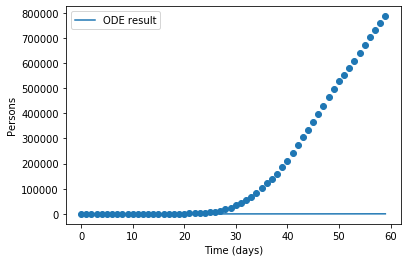

In [471]:
length = 60

beta = 0.0609266174999754
D = 145.8343055068469
N = p    # population size

int_steps = 20
plt.scatter(y=i,x=range(0,len(i),1))
S_ODE, I_ODE = sim_fun_ODE(s,i,beta, N, D, int_steps, length)
S_SDE, I_SDE = sim_fun_SDE(s,i,beta, N, D, int_steps, length)
plt.plot(I_ODE,label='ODE result')
#plt.plot(I_SDE,label='SDE result')

plt.xlabel('Time (days)')
plt.ylabel('Persons')
plt.legend()


##beta = 0.3                  # infection rate
#D = 7                   # average duration of the infection
#N = 300000000.0/10000.0     # population size


plt.show()

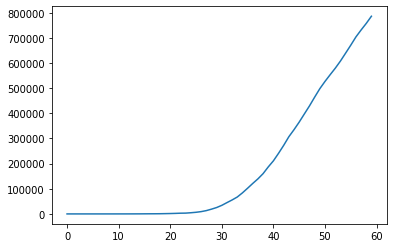

In [472]:
plt.plot(i)

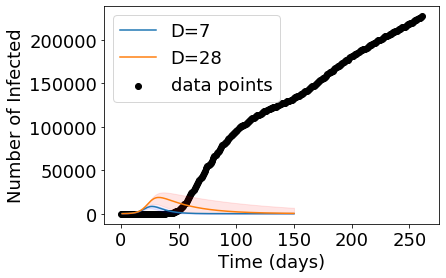

<Figure size 432x288 with 0 Axes>

In [20]:


# simulations of the ODE/SDE SIR model:
length = 150
int_steps = 20
N = 300000000.0/10000.0     # population size

# D = 5.0                    # average duration of the infection
D = 7.0*0.7                    # average duration of the infection
beta = 0.26 + 1.0/D         # infection rate
S_ODE_5, I_ODE_5 = sim_fun_ODE(beta, N, D, int_steps, length)

D = 7.0                    # average duration of the infection
beta = 0.26 + 1.0/D         # infection rate
S_ODE_7, I_ODE_7 = sim_fun_ODE(beta, N, D, int_steps, length)

# D = 10.0                    # average duration of the infection
D = 7.0*1.2                    # average duration of the infection
beta = 0.26 + 1.0/D         # infection rate
S_ODE_10, I_ODE_10 = sim_fun_ODE(beta, N, D, int_steps, length)


D = 1.0/( 1.0/(7.0*0.7) - 1.0/7.0 + 1.0/28.0 )                    # average duration of the infection
beta = 0.26 + 1.0/D         # infection rate
S_ODE_20, I_ODE_20 = sim_fun_ODE(beta, N, D, int_steps, length)

D = 28.0                    # average duration of the infection
beta = 0.26 + 1.0/D         # infection rate
S_ODE_28, I_ODE_28 = sim_fun_ODE(beta, N, D, int_steps, length)

D = 1.0/( 1.0/28.0-1.0/7.0+1.0/(7.0*1.2) )                    # average duration of the infection
beta = 0.26 + 1.0/D         # infection rate
S_ODE_30, I_ODE_30 = sim_fun_ODE(beta, N, D, int_steps, length)


fig, ax = plt.subplots()
x= np.linspace(1.0, 150.0, 150)
ax.plot(x, I_ODE_7, label='D=7')
ax.plot(x, I_ODE_28, label='D=28')
ax.scatter(range(0,len(us_death)-19,1), us_death[19:], color = 'black', marker = 'o', label='data points')
ax.fill_between(x, I_ODE_5, I_ODE_10, color='b', alpha=0.1)
ax.fill_between(x, I_ODE_20, I_ODE_30, color='r', alpha=0.1)
plt.xlabel('Time (days)', fontsize=18)
plt.ylabel('Number of Infected', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.show()
plt.savefig("epi_comp.eps")